# IMPORT PACKAGE

In [52]:
import tensorflow as tf
import tensorflow.keras.datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

#  Ambil dataset dari tensorflow

In [75]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) =  tfds.cifar100.load_data()

# cek Gambar

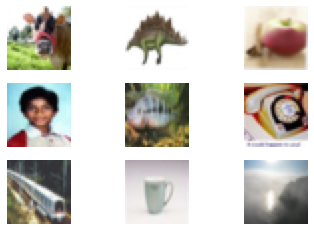

In [76]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

In [85]:
# Encode label
num_class = len(np.unique(y_train_raw))
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_class)


x_train = x_train_raw.reshape(50000, 3072)
x_test = x_test_raw.reshape(10000, 3072)

x_train = tf.cast(x_train, tf.float32) / 255
x_test = tf.cast(x_test, tf.float32) / 255

In [86]:
# cek dimensi
x_train.shape

TensorShape([50000, 3072])

# Modeling

In [91]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=3072),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='gelu'),
    tf.keras.layers.Dense(256, activation='swish'),
    tf.keras.layers.Dense(256, activation='hard_sigmoid'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

In [92]:
# Konfigurasi model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)


In [93]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# lakukan pelatihan

In [65]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=[x_test, y_test])

Epoch 1/10
469/469 [==============================] - 6s 10ms/step - loss: 0.4996 - accuracy: 0.8201 - val_loss: 0.4146 - val_accuracy: 0.8543
Epoch 2/10
469/469 [==============================] - 4s 10ms/step - loss: 0.3618 - accuracy: 0.8660 - val_loss: 0.3735 - val_accuracy: 0.8643
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3249 - accuracy: 0.8792 - val_loss: 0.3608 - val_accuracy: 0.8707
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3003 - accuracy: 0.8879 - val_loss: 0.3467 - val_accuracy: 0.8719
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2845 - accuracy: 0.8939 - val_loss: 0.3480 - val_accuracy: 0.8717
Epoch 6/10
469/469 [==============================] - 4s 10ms/step - loss: 0.2683 - accuracy: 0.8995 - val_loss: 0.3458 - val_accuracy: 0.8757
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2541 - accuracy: 0.9050 - val_loss: 0.3391 - val_accuracy: 0.8817
E

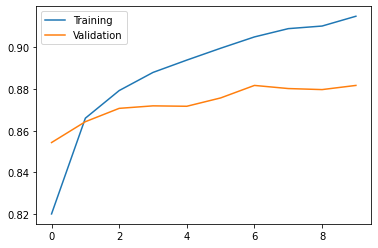

In [74]:
# Grafik learning rate
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label='Training')
plt.plot(nilai_x, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()